### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Add intro for your project

### Problem Statement

A customer is the most important aspect for any business to withstand. Hence Customer Relationship Management(CRM) becomes crucial.
In this model we will be building CRM using RFM(Recency, frequency and Monetary) of the customer and will find the average revenue generated over
their entire relationship with the company.

Here Recency is the fresheness of the customer activity, Frequency is the frequency(repeatitions) of customer transactions and Monetary is the willingness to spend

The features that will affect this model are :-
    
1. InvoiceNo.     - The number of the invoice, unique for each purchase. Refund invoice numbers contain "C"
2. StockCode      - Unique code for each item 
3. Description    - Name of the item 
4. Quantity       - The number of items with the invoice 
5. InvoiceDate    - Date and time of purchase 
6. UnitPrice      - Price of a single item 
7. CustomerID     - Unique ID number for each customer 
8. Country        - The country where the customer is living 

### Data Gathering

In [2]:
crm_df = pd.read_excel("Online_Retail.xlsx")
df2 = crm_df.copy()

In [3]:
crm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
crm_df.shape

(541909, 8)

In [5]:
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
crm_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
crm_df[["Quantity","UnitPrice"]].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


### EDA

#### Finding Null values

In [8]:
crm_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
print('Number of missing values in the dataset:', crm_df.isnull().sum().sum())
print('Percentage of missing values in the dataset:', crm_df.isnull().sum().sum()*100/(crm_df.shape[0]*crm_df.shape[1]))

Number of missing values in the dataset: 136534
Percentage of missing values in the dataset: 3.149375633178264


In [10]:
print("Number of missing values in 'Description' column:", crm_df['Description'].isnull().sum())
print("Percentage of missing values in 'Description' column:", crm_df['Description'].isnull().sum()*100/crm_df.shape[0])

Number of missing values in 'Description' column: 1454
Percentage of missing values in 'Description' column: 0.2683107311375157


In [11]:
print("Number of missing values in 'CustomerID' column:", crm_df['CustomerID'].isnull().sum())
print("Percentage of missing values in 'CustomerID' column:", crm_df['CustomerID'].isnull().sum()*100/crm_df.shape[0])

Number of missing values in 'CustomerID' column: 135080
Percentage of missing values in 'CustomerID' column: 24.926694334288598


About 25% of CustomerIDs is missing

#### Duplicate_Value

In [12]:
crm_df.duplicated().sum()

5268

In [13]:
duplicate = crm_df[crm_df.duplicated()]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


As we see here that there is different 'Description' for the same 'InvoiceNo' and 'CustomerID',so we are not considering it as duplicates,so we are not dropping it.

#### Checking for Unique values in the Dataset

In [14]:
print('Number of Unique Transactions >> ',crm_df['InvoiceNo'].nunique())
print('Number of Unique StockCode >> ',crm_df['StockCode'].nunique())
print('Number of Unique Products >> ',crm_df['Description'].nunique())
print('Number of Unique Quantity >> ',crm_df['Quantity'].nunique())
print('Number of Unique InvoiceDates >> ',crm_df['InvoiceDate'].nunique())
print('Number of Unique UnitPrice >> ',crm_df['UnitPrice'].nunique())
print('Number of Unique Customers >> ',crm_df['CustomerID'].nunique())
print('Number of Unique Countries >> ',crm_df['Country'].nunique())

Number of Unique Transactions >>  25900
Number of Unique StockCode >>  4070
Number of Unique Products >>  4223
Number of Unique Quantity >>  722
Number of Unique InvoiceDates >>  23260
Number of Unique UnitPrice >>  1630
Number of Unique Customers >>  4372
Number of Unique Countries >>  38


#### Calculate Peroid of purchasing

In [15]:
d1=crm_df['InvoiceDate'].min()

In [16]:
d2=crm_df['InvoiceDate'].max()

In [17]:
print('Period of purchasing : ',d2-d1)  # Approximate 1 year 

Period of purchasing :  373 days 04:24:00


#### Checking for distibution of Purchase Countriwise

<AxesSubplot: >

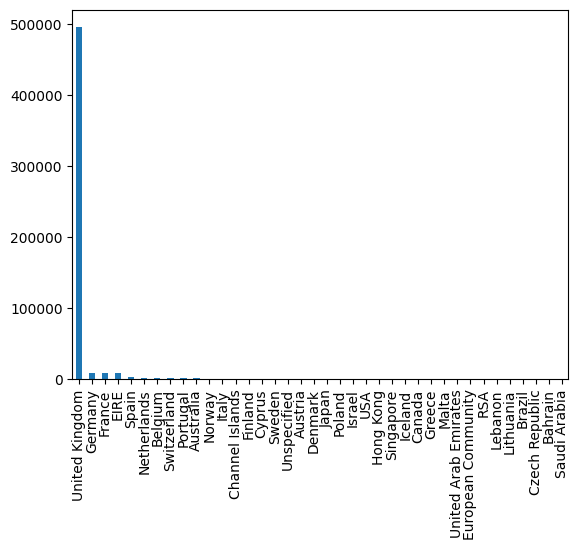

In [18]:
crm_df['Country'].value_counts().plot.bar()

So we have approximately 1 year data record of 25,900 purchases for 4,372 unique users made in 38 countries (mostly in the UK)

### Quantity and unit price of the products

In [19]:
crm_df['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

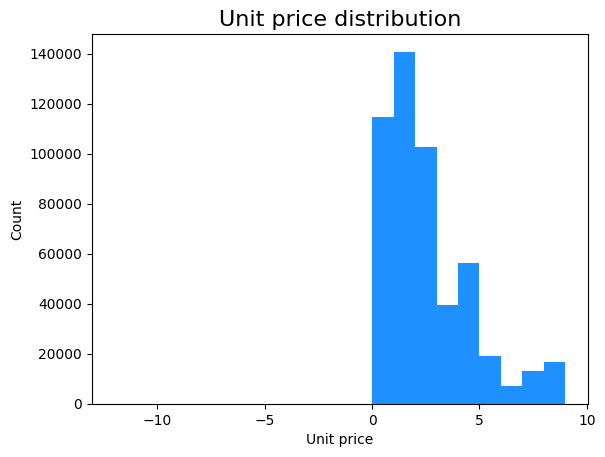

In [20]:
# Let's look at the price distribution of the products

bins=np.arange(-12,10,1)

plt.hist(data=crm_df, x='UnitPrice',bins=bins,color='dodgerblue')

plt.xlabel('Unit price', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title("Unit price distribution", fontsize=16);

It seems that we have negative values and some outliers representing very expensive products. The negative values may be associated with cancelled or refunded orders. Let's remove negative records and outliers and look at the price distribution

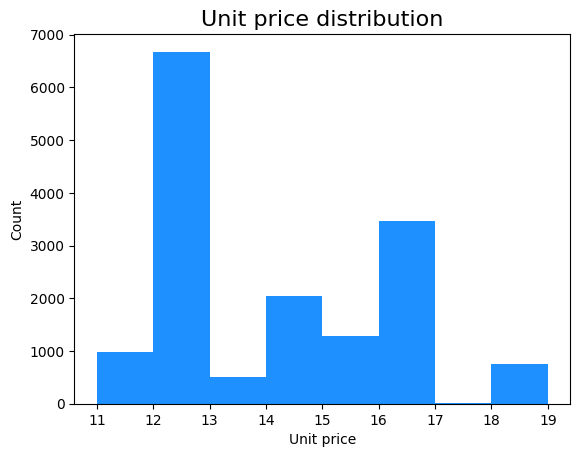

In [21]:
# Let's look at the price distribution of the products

bins=np.arange(11,20,1)

plt.hist(data=crm_df, x='UnitPrice',bins=bins,color='dodgerblue')

plt.xlabel('Unit price', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title("Unit price distribution", fontsize=16);

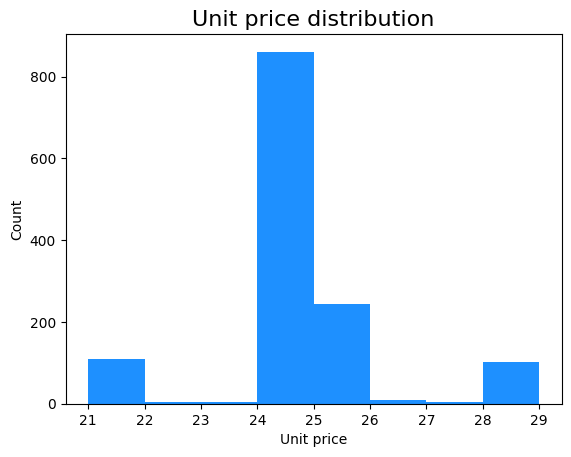

In [22]:
# Let's look at the price distribution of the products

bins=np.arange(21,30,1)

plt.hist(data=crm_df, x='UnitPrice',bins=bins,color='dodgerblue')

plt.xlabel('Unit price', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title("Unit price distribution", fontsize=16);

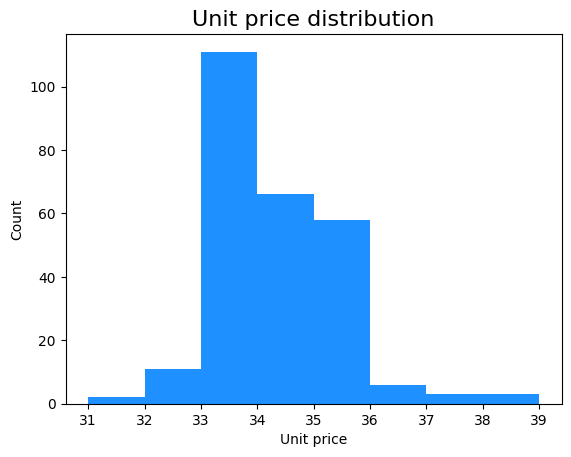

In [23]:
# Let's look at the price distribution of the products

bins=np.arange(31,40,1)

plt.hist(data=crm_df, x='UnitPrice',bins=bins,color='dodgerblue')

plt.xlabel('Unit price', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title("Unit price distribution", fontsize=16);

In [24]:
crm_df['UnitPrice'].max()

38970.0

In [25]:
crm_df['UnitPrice'].min()

-11062.06

In [26]:
crm_df[crm_df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Out of all the UnitPrice records only 2 records are negative,so that we can drop these records during Cleaning process

### Quantity

In [27]:
crm_df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

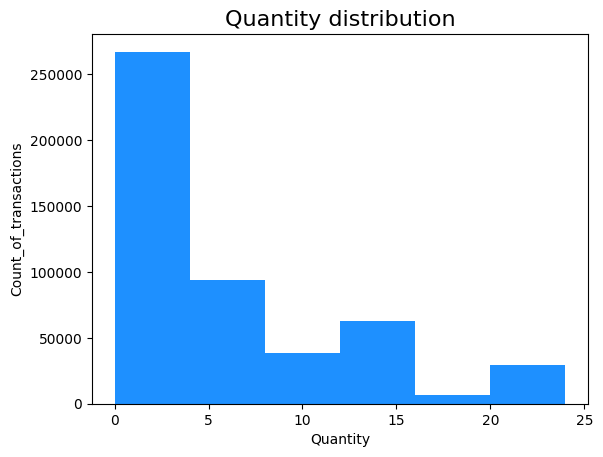

In [28]:
# Let's look at the Quantity distribution of the products

bins=np.arange(0,25,4)

plt.hist(data=crm_df, x='Quantity',bins=bins,color='dodgerblue')

plt.xlabel('Quantity', fontsize=10)
plt.ylabel('Count_of_transactions', fontsize=10)
plt.title("Quantity distribution", fontsize=16);

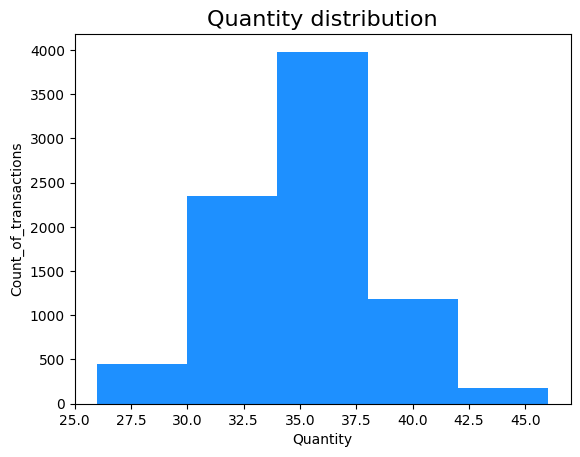

In [29]:
# Let's look at the Quantity distribution of the products

bins=np.arange(26,50,4)

plt.hist(data=crm_df, x='Quantity',bins=bins,color='dodgerblue')

plt.xlabel('Quantity', fontsize=10)
plt.ylabel('Count_of_transactions', fontsize=10)
plt.title("Quantity distribution", fontsize=16);

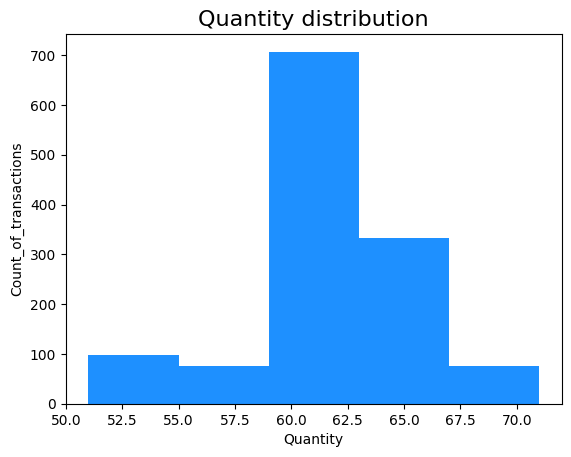

In [30]:
# Let's look at the Quantity distribution of the products

bins=np.arange(51,75,4)

plt.hist(data=crm_df, x='Quantity',bins=bins,color='dodgerblue')

plt.xlabel('Quantity', fontsize=10)
plt.ylabel('Count_of_transactions', fontsize=10)
plt.title("Quantity distribution", fontsize=16);

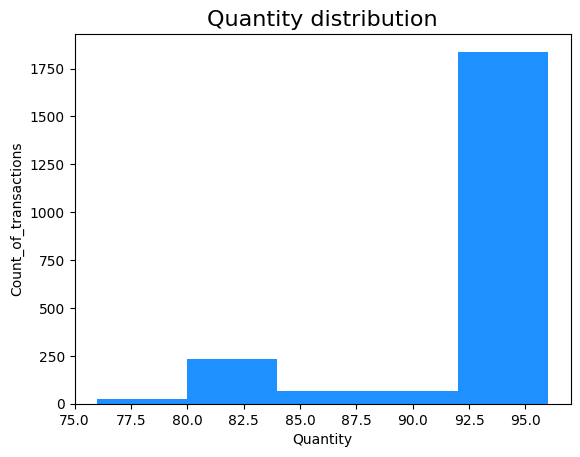

In [31]:
# Let's look at the Quantity distribution of the products

bins=np.arange(76,100,4)

plt.hist(data=crm_df, x='Quantity',bins=bins,color='dodgerblue')

plt.xlabel('Quantity', fontsize=10)
plt.ylabel('Count_of_transactions', fontsize=10)
plt.title("Quantity distribution", fontsize=16);

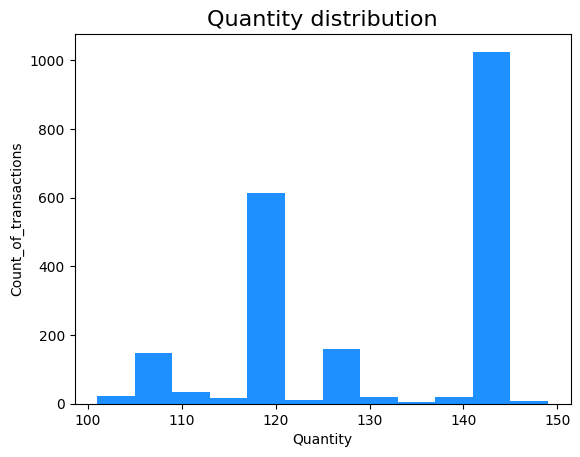

In [32]:
# Let's look at the Quantity distribution of the products

bins=np.arange(101,150,4)

plt.hist(data=crm_df, x='Quantity',bins=bins,color='dodgerblue')

plt.xlabel('Quantity', fontsize=10)
plt.ylabel('Count_of_transactions', fontsize=10)
plt.title("Quantity distribution", fontsize=16);

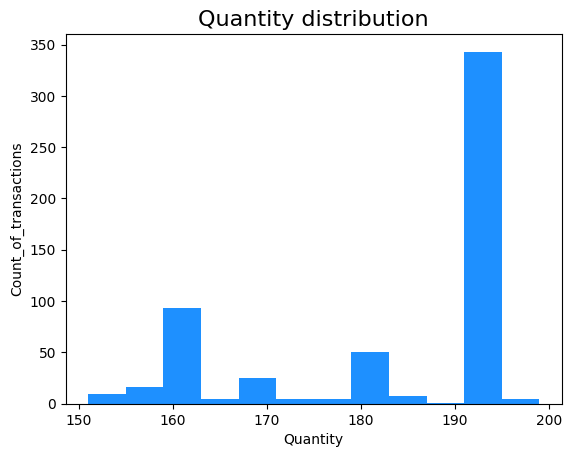

In [33]:
# Let's look at the Quantity distribution of the products

bins=np.arange(151,200,4)

plt.hist(data=crm_df, x='Quantity',bins=bins,color='dodgerblue')

plt.xlabel('Quantity', fontsize=10)
plt.ylabel('Count_of_transactions', fontsize=10)
plt.title("Quantity distribution", fontsize=16);

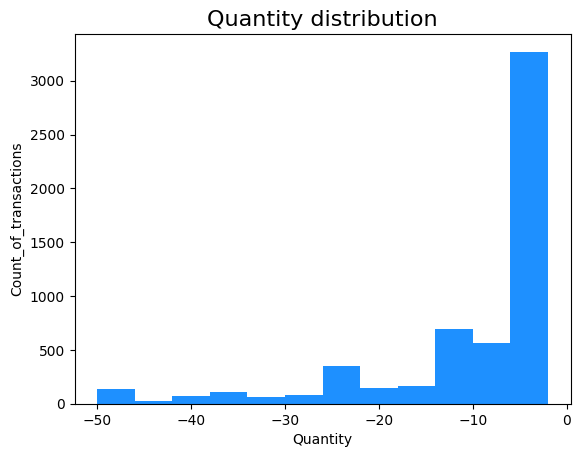

In [34]:
# Let's look at the Quantity distribution of the cancel  products

bins=np.arange(-50,-1,4)

plt.hist(data=crm_df, x='Quantity',bins=bins,color='dodgerblue')

plt.xlabel('Quantity', fontsize=10)
plt.ylabel('Count_of_transactions', fontsize=10)
plt.title("Quantity distribution", fontsize=16);

In [35]:
df1=crm_df.groupby(['Description']).agg({'Quantity':sum}).reset_index()
df1


,Description,Quantity
0,20713,-400
1,4 PURPLE FLOCK DINNER CANDLES,144
2,50'S CHRISTMAS GIFT BAG LARGE,1913
3,DOLLY GIRL BEAKER,2448
4,I LOVE LONDON MINI BACKPACK,389
...,...,...
4218,wrongly marked carton 22804,-256
4219,wrongly marked. 23343 in box,-3100
4220,wrongly sold (22719) barcode,170
4221,wrongly sold as sets,-600


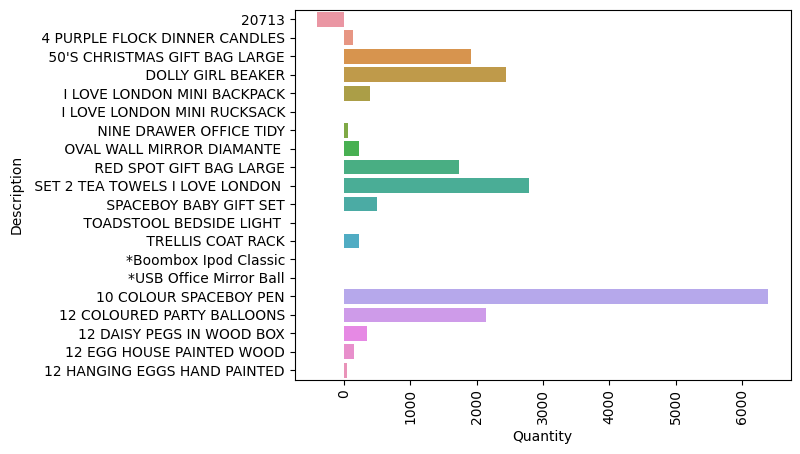

In [36]:
sns.barplot(x="Quantity", y="Description", data=df1.head(20))
plt.xticks(rotation=90)
plt.show()

### plot of top 10 products sold

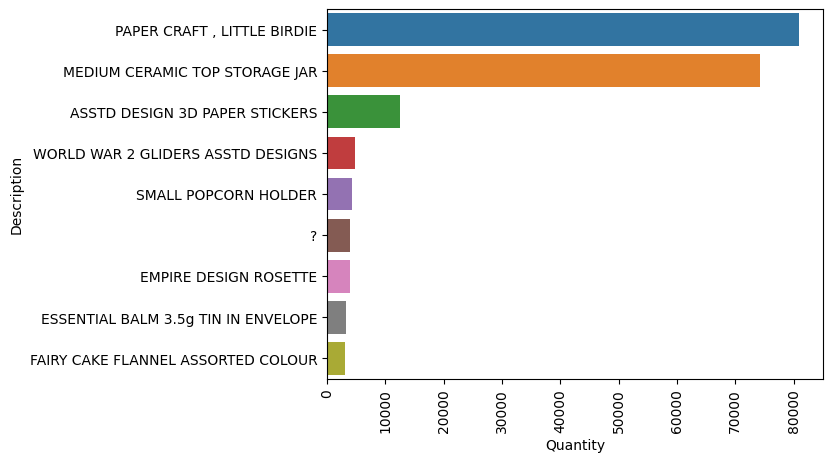

In [37]:
top_pr= crm_df.sort_values(by="Quantity",ascending=False).head(10)

sns.barplot(x="Quantity", y="Description", data=top_pr)
plt.xticks(rotation=90)
plt.show()

### We find out top 10 customers with maximum quantity of products purchased

In [38]:
df2=crm_df.groupby(['CustomerID']).agg({'Quantity':sum}).reset_index()
df_cust=df2.sort_values(by='Quantity',ascending=False).head(10)
df_cust

,CustomerID,Quantity
1703,14646.0,196719
55,12415.0,77242
1895,14911.0,77180
3758,17450.0,69029
4233,18102.0,64122
3801,17511.0,63012
1005,13694.0,61803
1447,14298.0,58021
1345,14156.0,57025
3202,16684.0,49390


Text(0.5, 1.0, 'Relation of CustomerID and Quantity')

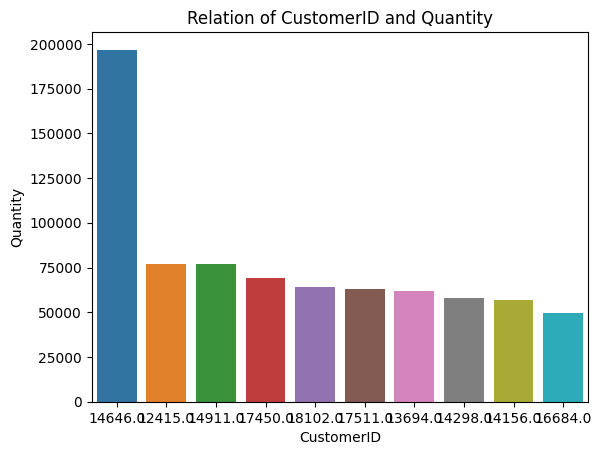

In [39]:
sns.barplot(x='CustomerID',y='Quantity',data=df_cust,order=df_cust['CustomerID'])
plt.title('Relation of CustomerID and Quantity')

### Relation of CustomerID and its total purchase

In [40]:
df3=crm_df.groupby(['CustomerID']).agg({'UnitPrice':sum}).reset_index()
df_price=df3.sort_values(by='UnitPrice',ascending=False).head(10)
df_price

,CustomerID,UnitPrice
1300,14096.0,41376.33
2027,15098.0,40278.90
1895,14911.0,31060.66
328,12744.0,25108.89
2722,16029.0,24111.14
4042,17841.0,20333.18
330,12748.0,15115.60
154,12536.0,13255.22
338,12757.0,8035.24
1674,14606.0,7839.02


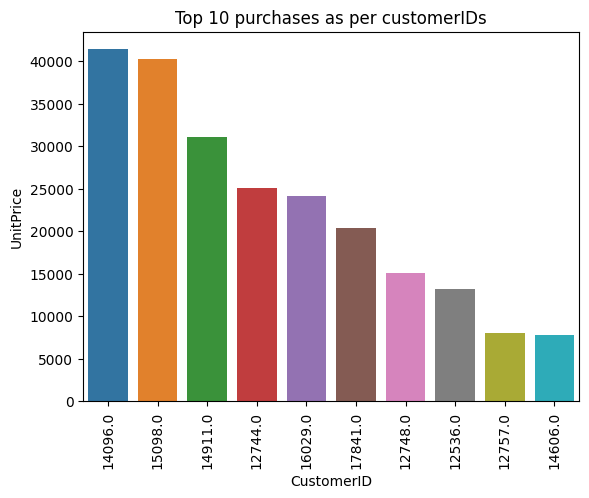

In [41]:
sns.barplot(x="CustomerID", y="UnitPrice", data=df_price,order=df_price['CustomerID'])
plt.xticks(rotation=90)
plt.title('Top 10 purchases as per customerIDs')
plt.show()

## Calculating sale for each product

In [115]:
df_product2 = crm_final.groupby("Description").agg({"Quantity":"count",})
df_product2.reset_index(inplace=True)
df_product3=df_product2.sort_values(by='Quantity',ascending=False).head(20)
df_product3['Percentage_Quantity']=((df_product3['Quantity']/df_product3['Quantity'].sum())*100)
df_product3                        

,Description,Quantity,Percentage_Quantity
3689,WHITE HANGING HEART T-LIGHT HOLDER,1976,8.609647
2758,REGENCY CAKESTAND 3 TIER,1676,7.302514
1761,JUMBO BAG RED RETROSPOT,1576,6.866803
2337,PARTY BUNTING,1379,6.008453
216,ASSORTED COLOUR BIRD ORNAMENT,1366,5.951810
1936,LUNCH BAG RED RETROSPOT,1281,5.581456
2992,SET OF 3 CAKE TINS PANTRY DESIGN,1130,4.923533
1928,LUNCH BAG BLACK SKULL.,1066,4.644678
2602,POSTAGE,1050,4.574964
2262,PACK OF 72 RETROSPOT CAKE CASES,1047,4.561893


Text(0.5, 1.0, 'Sales for each product')

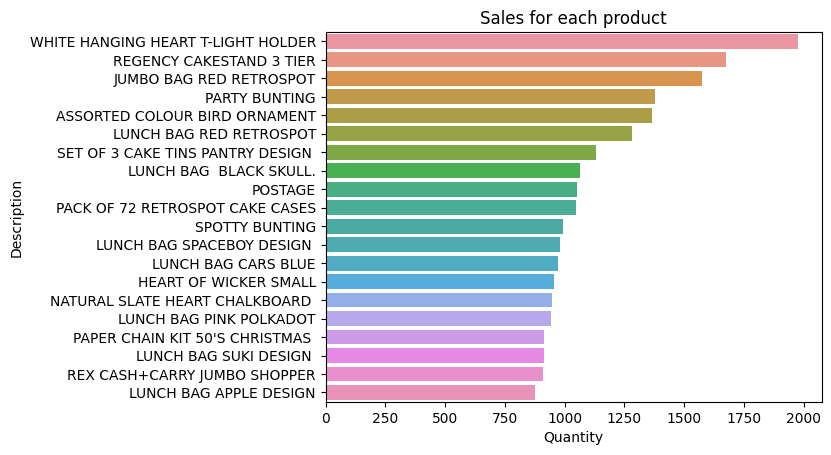

In [116]:
sns.barplot(x='Quantity',y='Description',data=df_product3,order=df_product3['Description'])
plt.title('Sales for each product')

### Comparing Top 10 Customers Through pie chart

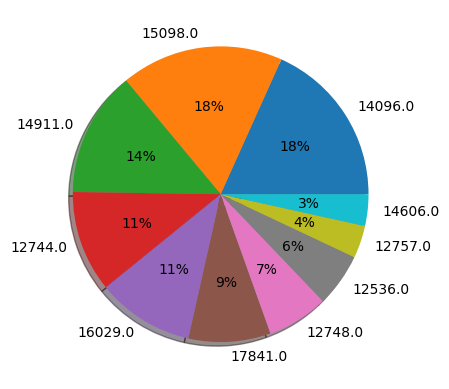

In [42]:
plt.pie(df_price['UnitPrice'],labels=df_price['CustomerID'],autopct='%1.0f%%',shadow=True)
plt.show()


### Ignoring negative quantity rows

In [43]:
neg_qty = crm_df[crm_df['Quantity'] < 0]
neg_qty

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [44]:
print('Percentage of Negative Quantity >>',((neg_qty.shape[0])*100)/crm_df.shape[0])

Percentage of Negative Quantity >> 1.9604767590130445


Out of all the Quantity records,around 2% quantity is Negative as these are cancelled orders (InvoiceNo stared with 'C' eg.C536379)

### Data Cleaning and Transformation

#### Handling Null Values

As we have some entries with no 'CustomerID', we need to drop these rows as they cannot be used to calculate RFM.


In [45]:
crm_df.dropna(subset=['CustomerID'], inplace=True)

In [46]:
crm_df['CustomerID'].isna().sum()

0

In [47]:
crm_df.shape

(406829, 8)

In [48]:
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [49]:
crm_df['Description'].isna().sum()

0

Here we can observed that by dropping null values from the 'CustomerID',null values from 'Description' has also been dropped.

### Handling negative values

#### Quantity

In [50]:
crm_update= crm_df.loc[crm_df['Quantity'] > 0]
crm_update

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


We are ignoring cancelled orders from our further calculations

In [51]:
crm_negative= crm_df.loc[crm_df['Quantity'] < 0]
crm_negative

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [52]:
df3=crm_negative.groupby(['CustomerID','Description']).agg({'Quantity':sum,'UnitPrice':sum}).reset_index()
df_quan=df3.sort_values(by='Quantity',ascending=True)
df_quan['cancel_amount']=df_quan['Quantity']*df_quan['UnitPrice']
df_quantity=df_quan.head(10)

Text(0.5, 1.0, 'Relation of CustomerID and Return Quantity')

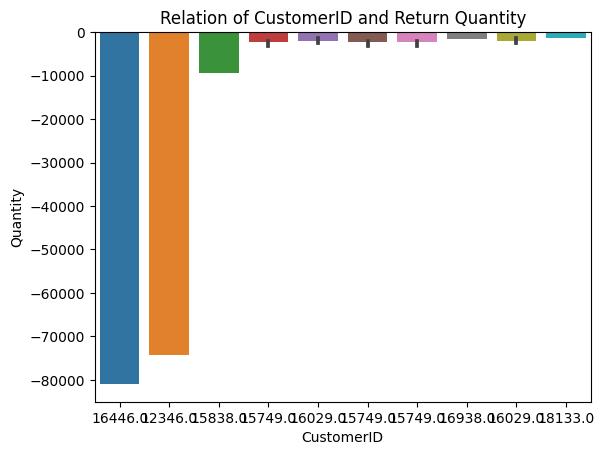

In [53]:
sns.barplot(x='CustomerID',y='Quantity',data=df_quantity,order=df_quantity['CustomerID'])
plt.title('Relation of CustomerID and Return Quantity')

Text(0.5, 1.0, 'Relation of Description and Return Quantity')

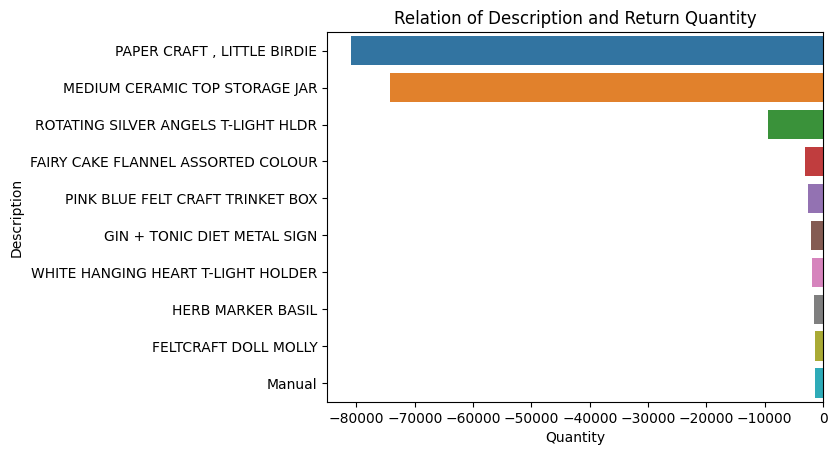

In [54]:
sns.barplot(x='Quantity',y='Description',data=df_quantity,order=df_quantity['Description'])
plt.title('Relation of Description and Return Quantity')

#### Unit Price

In [55]:
crm_df[crm_df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


As we can see that the negative values from 'UnitPrice' have already removed at the time of handling missing values.

### Handling Incomplete Data

Period of time for the purchase records is from December 1, 2010 to December 9, 2011. The data for the last month is incomplete. Because we are planning to predict CLTV for the next 3 months and we will be aggregating data monthly, let us ignore the records for the incomplete month.

In [56]:
crm_final = crm_update.loc[crm_update['InvoiceDate'] < '2011-12-01']
crm_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom


In [120]:
crm_final.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
380615,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30,1.25,15444.0,United Kingdom,5.00
380616,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30,5.95,15444.0,United Kingdom,11.90
380617,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30,2.08,15444.0,United Kingdom,12.48
380618,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30,7.95,15444.0,United Kingdom,7.95


In [121]:
data=np.where(crm_final['Country'] == 'United Kingdom')[0]
data1=np.where(crm_final['Country'] == 'Germany')[0]
data2=np.where(crm_final['Country'] == 'France')[0]
data3=np.where(crm_final['Country'] == 'Spain')[0]
data4=np.where(crm_final['Country'] == 'Netherlands')[0]
data5=np.where(crm_final['Country'] == 'EIRE')[0]

In [130]:
crm_final['Converted_Price']=np.where(crm_final['Country'] =='Germany',crm_final['UnitPrice']*1.12, crm_final['Converted_Price']*1)
crm_final['Converted_Price']=np.where(crm_final['Country'] =='France',crm_final['UnitPrice']*1.12, crm_final['Converted_Price']*1)
crm_final['Converted_Price']=np.where(crm_final['Country'] =='Spain',crm_final['UnitPrice']*1.12, crm_final['Converted_Price']*1)
crm_final['Converted_Price']=np.where(crm_final['Country'] =='Netherlands',crm_final['UnitPrice']*1.12, crm_final['Converted_Price']*1)
crm_final['Converted_Price']=np.where(crm_final['Country'] =='EIRE',crm_final['UnitPrice']*1.12, crm_final['Converted_Price']*1)
crm_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Converted_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2.55
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,3.39
...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30,1.25,15444.0,United Kingdom,5.00,1.25
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30,5.95,15444.0,United Kingdom,11.90,5.95
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30,2.08,15444.0,United Kingdom,12.48,2.08
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30,7.95,15444.0,United Kingdom,7.95,7.95


In [132]:
crm_final[1098:1110]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Converted_Price
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01,2.95,12662.0,Germany,17.70,3.3040
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01,2.55,12662.0,Germany,15.30,2.8560
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01,0.85,12662.0,Germany,10.20,0.9520
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01,1.65,12662.0,Germany,19.80,1.8480
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01,1.95,12662.0,Germany,23.40,2.1840
1114,536527,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,12,2010-12-01,1.65,12662.0,Germany,19.80,1.8480
1115,536527,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,24,2010-12-01,0.42,12662.0,Germany,10.08,0.4704
1116,536527,20712,JUMBO BAG WOODLAND ANIMALS,10,2010-12-01,1.95,12662.0,Germany,19.50,2.1840
1117,536527,20713,JUMBO BAG OWLS,10,2010-12-01,1.95,12662.0,Germany,19.50,2.1840
1118,536527,22837,HOT WATER BOTTLE BABUSHKA,4,2010-12-01,4.65,12662.0,Germany,18.60,5.2080


In [57]:
crm_final['InvoiceDate'].min(),crm_final['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 17:37:00'))

Checking the time period

## Country

In [58]:
df_crty=crm_df.groupby(['Country']).agg({'Quantity':sum}).reset_index().sort_values(by='Quantity',ascending=False).head(10)
df_crty

,Country,Quantity
35,United Kingdom,4008533
23,Netherlands,200128
10,EIRE,136329
14,Germany,117448
13,France,109848
0,Australia,83653
31,Sweden,35637
32,Switzerland,29778
30,Spain,26824
19,Japan,25218


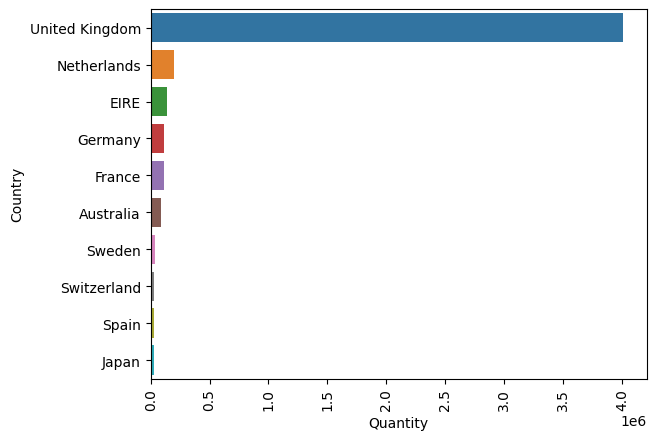

In [59]:
sns.barplot(x="Quantity", y="Country", data=df_crty.head(20))
plt.xticks(rotation=90)
plt.show()

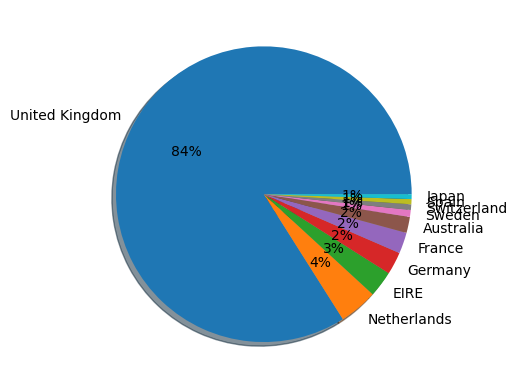

In [60]:
plt.pie(df_crty['Quantity'],labels=df_crty['Country'],autopct='%1.0f%%',shadow=True)
plt.show()

In [61]:
crm_final['Country'].nunique()

37

In [62]:
np.around((crm_final['Country'].value_counts(normalize=True)*100),2)

United Kingdom          88.95
Germany                  2.29
France                   2.11
EIRE                     1.82
Spain                    0.64
Netherlands              0.60
Belgium                  0.51
Switzerland              0.48
Portugal                 0.36
Australia                0.31
Norway                   0.26
Italy                    0.20
Channel Islands          0.20
Finland                  0.18
Cyprus                   0.16
Sweden                   0.12
Austria                  0.10
Denmark                  0.10
Poland                   0.09
Japan                    0.08
Israel                   0.07
Unspecified              0.06
Singapore                0.06
Iceland                  0.04
Canada                   0.04
USA                      0.04
Malta                    0.03
Greece                   0.03
United Arab Emirates     0.02
European Community       0.02
RSA                      0.02
Lebanon                  0.01
Lithuania                0.01
Brazil    

In [63]:
crm_final['InvoiceDate'] = crm_final['InvoiceDate'].dt.date

In [64]:
crm_final.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047.0,United Kingdom


In [65]:
crm_final['Sales'] = crm_final['Quantity'] * crm_final['UnitPrice']
crm_final.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047.0,United Kingdom,54.08


In [66]:
df_orders = crm_final.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum , 'InvoiceDate': max}).reset_index()

In [67]:
df_orders.head(10)

,CustomerID,InvoiceNo,Sales,InvoiceDate
0,12346.0,541431,77183.60,2011-01-18
1,12347.0,537626,711.79,2010-12-07
2,12347.0,542237,475.39,2011-01-26
3,12347.0,549222,636.25,2011-04-07
4,12347.0,556201,382.52,2011-06-09
5,12347.0,562032,584.91,2011-08-02
6,12347.0,573511,1294.32,2011-10-31
7,12348.0,539318,892.80,2010-12-16
8,12348.0,541998,227.44,2011-01-25
9,12348.0,548955,367.00,2011-04-05


# Calculate RFM Score(Recency,Frequency,Monetary)

## Recency

In [68]:
df_recency = df_orders.groupby(by='CustomerID',
                        as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()


,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,316
1,12347.0,2011-10-31,30
2,12348.0,2011-09-25,66
3,12349.0,2011-11-21,9
4,12350.0,2011-02-02,301


In [69]:
recent_date

datetime.date(2011, 11, 30)

## Frequency

In [70]:
frequency_df = df_orders.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,6
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Monetary

In [71]:
monetary_df = df_orders.groupby(by='CustomerID', as_index=False)['Sales'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head(10)

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,2506.04
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


In [72]:
RFM_df= pd.DataFrame(df_orders['CustomerID'].unique())
RFM_df.columns = ['CustomerID']
RFM_df

,CustomerID
0,12346.0
1,12347.0
2,12348.0
3,12349.0
4,12350.0
...,...
4293,18280.0
4294,18281.0
4295,18282.0
4296,18283.0


In [73]:
RFM_df= pd.merge(RFM_df, df_recency[['CustomerID','Recency']], on='CustomerID')
RFM_df

,CustomerID,Recency
0,12346.0,316
1,12347.0,30
2,12348.0,66
3,12349.0,9
4,12350.0,301
...,...,...
4293,18280.0,268
4294,18281.0,171
4295,18282.0,117
4296,18283.0,0


In [74]:
RFM_df['Recency'].describe()

count    4298.000000
mean       90.461610
std        98.574978
min         0.000000
25%        15.000000
50%        49.000000
75%       144.500000
max       364.000000
Name: Recency, dtype: float64

### RecencyCluster

### Recency Scaling 

In [75]:
std_scaler  = StandardScaler()
scaled_data = std_scaler.fit_transform(RFM_df[['Recency']])
scl_df = pd.DataFrame(scaled_data, columns= ['Recency'])
scl_df

,Recency
0,2.288254
1,-0.613428
2,-0.248181
3,-0.826489
4,2.136068
...,...
4293,1.801259
4294,0.817122
4295,0.269252
4296,-0.917800


In [76]:
wcss_list = []
cluster_range = range(1,10)

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(scl_df)
    wcss = kmeans_model.inertia_
    wcss = np.around(wcss,3)
    wcss_list.append(wcss)
    print(f'k >> {k}, WCSS >> {wcss}')

k >> 1, WCSS >> 4298.0
k >> 2, WCSS >> 885.979
k >> 3, WCSS >> 412.258
k >> 4, WCSS >> 242.654
k >> 5, WCSS >> 147.573
k >> 6, WCSS >> 100.312
k >> 7, WCSS >> 78.177
k >> 8, WCSS >> 58.736
k >> 9, WCSS >> 44.976


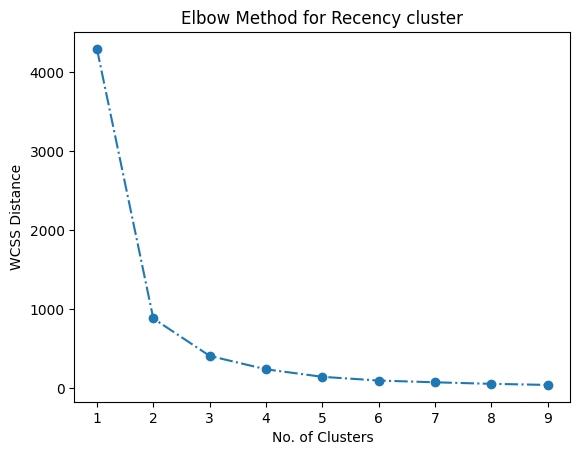

In [77]:
plt.title('Elbow Method for Recency cluster')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Distance')
plt.plot(cluster_range, wcss_list, marker = 'o', linestyle='-.')

## Optimal Number of clusters == 3

In [78]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(scl_df)

KMeans(n_clusters=3)

In [79]:
kmeans_model.labels_

array([0, 1, 1, ..., 2, 1, 1])

In [80]:
y_pred = kmeans_model.fit_predict(scl_df)
y_pred

array([2, 1, 1, ..., 0, 1, 1])

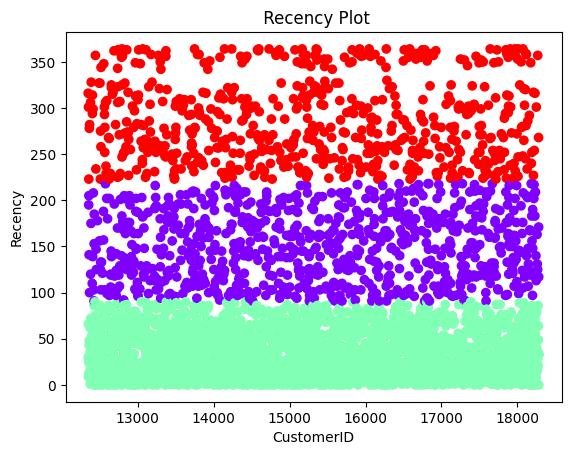

In [81]:
plt.title(' Recency Plot')
plt.xlabel('CustomerID')
plt.ylabel('Recency')
plt.scatter(x= RFM_df['CustomerID'], y =RFM_df['Recency'] , c= y_pred, cmap='rainbow')

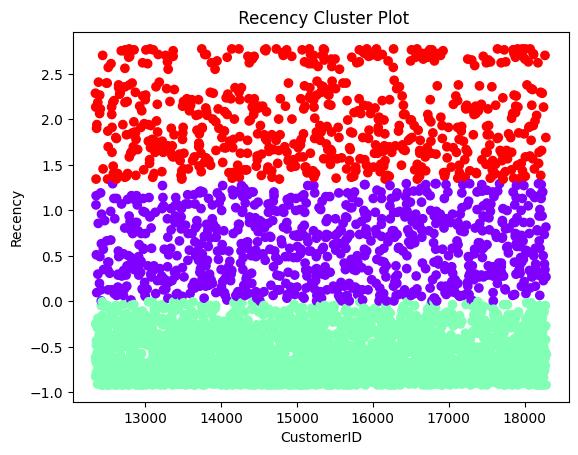

In [82]:
plt.title(' Recency Cluster Plot')
plt.xlabel('CustomerID')
plt.ylabel('Recency')
plt.scatter(x= RFM_df['CustomerID'], y =scl_df['Recency'] , c= y_pred, cmap='rainbow')


In [83]:
RFM_df['RecencyCluster'] = kmeans_model.labels_
RFM_df

,CustomerID,Recency,RecencyCluster
0,12346.0,316,2
1,12347.0,30,1
2,12348.0,66,1
3,12349.0,9,1
4,12350.0,301,2
...,...,...,...
4293,18280.0,268,2
4294,18281.0,171,0
4295,18282.0,117,0
4296,18283.0,0,1


In [84]:
RFM_df['RecencyCluster'].value_counts()

1    2852
0     816
2     630
Name: RecencyCluster, dtype: int64

In [85]:
RecencyCluster_Stats = RFM_df.groupby("RecencyCluster")["Recency"].describe()
RecencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,816.0,150.449755,36.942900,91.0,118.0,148.0,181.0,218.0
1,2852.0,29.875526,24.189774,0.0,9.0,23.0,48.0,90.0
2,630.0,287.034921,44.120936,223.0,251.0,279.0,320.0,364.0


### Frequency

In [86]:
frequency_df = df_orders.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,6
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Frequency Cluster

In [87]:
wcss_list = []
cluster_range = range(1,16)

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(frequency_df)
    wcss = kmeans_model.inertia_
    wcss = np.around(wcss,3)
    wcss_list.append(wcss)
    print(f'k >> {k}, WCSS >> {wcss}')

k >> 1, WCSS >> 12727019684.711
k >> 2, WCSS >> 3207990942.504
k >> 3, WCSS >> 1412717025.706
k >> 4, WCSS >> 798446158.755
k >> 5, WCSS >> 502494452.868
k >> 6, WCSS >> 352682384.965
k >> 7, WCSS >> 258207689.667
k >> 8, WCSS >> 200541778.078
k >> 9, WCSS >> 156008495.172
k >> 10, WCSS >> 124823236.858
k >> 11, WCSS >> 104017853.752
k >> 12, WCSS >> 87666948.271
k >> 13, WCSS >> 75160459.677
k >> 14, WCSS >> 64880287.312
k >> 15, WCSS >> 56351143.752


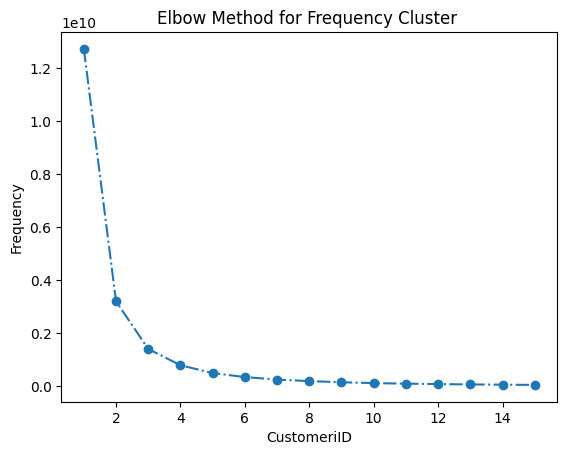

In [88]:
plt.title('Elbow Method for Frequency Cluster ')
plt.xlabel('CustomeriID')
plt.ylabel('Frequency')
plt.plot(cluster_range, wcss_list, marker = 'o', linestyle='-.')

## Optimal Number of clusters == 3

In [89]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(frequency_df[['Frequency']])

KMeans(n_clusters=3)

In [90]:
kmeans_model.labels_

array([0, 0, 0, ..., 0, 2, 0])

In [91]:
y_predf = kmeans_model.fit_predict(frequency_df[['Frequency']])
y_predf

array([0, 0, 0, ..., 0, 2, 0])

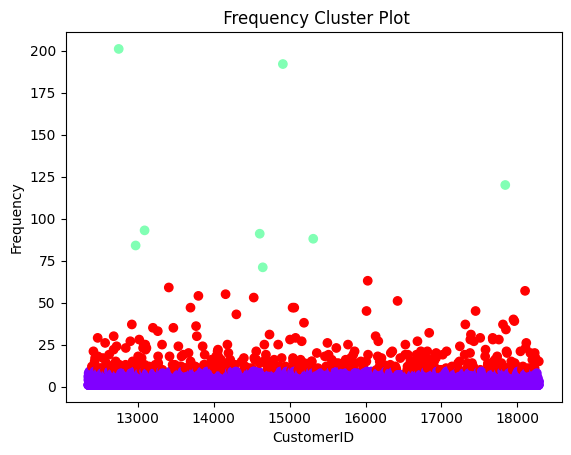

In [92]:
plt.title(' Frequency Cluster Plot')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.scatter(x= frequency_df['CustomerID'], y = frequency_df['Frequency'], c= y_predf, cmap='rainbow')

In [93]:
frequency_df['FrequencyCluster'] = kmeans_model.labels_
frequency_df

,CustomerID,Frequency,FrequencyCluster
0,12346.0,1,0
1,12347.0,6,0
2,12348.0,4,0
3,12349.0,1,0
4,12350.0,1,0
...,...,...,...
4293,18280.0,1,0
4294,18281.0,1,0
4295,18282.0,1,0
4296,18283.0,15,2


In [94]:
frequency_df['FrequencyCluster'].value_counts()

0    3930
2     360
1       8
Name: FrequencyCluster, dtype: int64

In [95]:
FrequencyCluster_Stats =frequency_df .groupby("FrequencyCluster")["Frequency"].describe()
FrequencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3930.0,2.705344,2.027979,1.0,1.0,2.0,4.0,9.0
1,8.0,117.500000,50.689531,71.0,87.0,92.0,138.0,201.0
2,360.0,17.183333,9.188509,10.0,11.0,14.0,19.0,63.0


## Monetary

In [96]:
monetary_df = df_orders.groupby(by='CustomerID', as_index=False)['Sales'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head(10)

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,2506.04
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


In [97]:
monetary_df['Monetary'].describe()

count      4298.000000
mean       1952.818779
std        8354.913254
min           0.000000
25%         304.305000
50%         657.265000
75%        1599.515000
max      268478.000000
Name: Monetary, dtype: float64

## Monetary Cluster

In [98]:
std_scaler  = StandardScaler()
scaled_data = std_scaler.fit_transform(monetary_df[['Monetary']])
scl_df = pd.DataFrame(scaled_data, columns= ['Monetary'])
scl_df

,Monetary
0,9.005424
1,0.255252
2,-0.018623
3,-0.023374
4,-0.193731
...,...
4293,-0.212142
4294,-0.224086
4295,-0.221765
4296,-0.007893


In [99]:
wcss_list = []
cluster_range = range(1,10)

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(scl_df)
    wcss = kmeans_model.inertia_
    wcss = np.around(wcss,3)
    wcss_list.append(wcss)
    print(f'k >> {k}, WCSS >> {wcss}')

k >> 1, WCSS >> 4298.0
k >> 2, WCSS >> 1523.699
k >> 3, WCSS >> 690.438
k >> 4, WCSS >> 433.163
k >> 5, WCSS >> 256.48
k >> 6, WCSS >> 176.303
k >> 7, WCSS >> 128.531
k >> 8, WCSS >> 87.752
k >> 9, WCSS >> 65.883


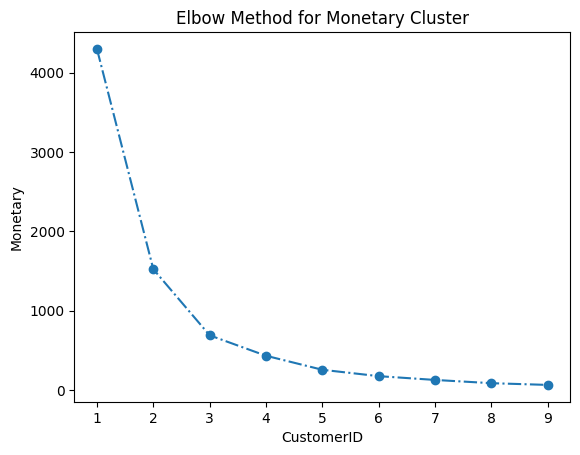

In [100]:
plt.title('Elbow Method for Monetary Cluster')
plt.xlabel('CustomerID')
plt.ylabel('Monetary')
plt.plot(cluster_range, wcss_list, marker = 'o', linestyle='-.')

## Optimal Number of clusters == 3

In [101]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(scl_df)

KMeans(n_clusters=3)

In [102]:
kmeans_model.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [103]:
y_predf = kmeans_model.fit_predict(scl_df)
y_predf

array([1, 0, 0, ..., 0, 0, 0])

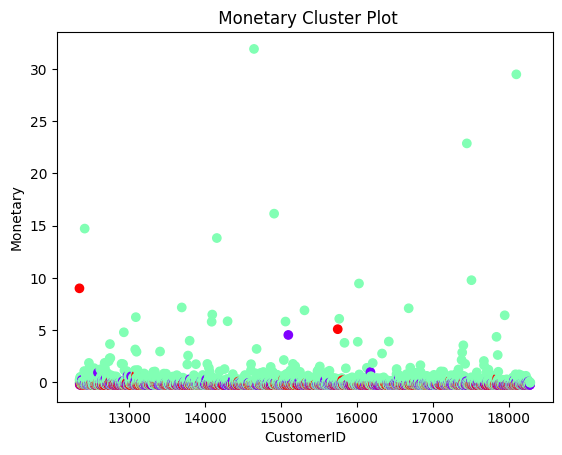

In [104]:
plt.title(' Monetary Cluster Plot')
plt.xlabel('CustomerID')
plt.ylabel('Monetary')
plt.scatter(x= RFM_df['CustomerID'], y =scl_df['Monetary'] , c= y_pred, cmap='rainbow')


In [105]:
monetary_df['Monetary Cluster']=kmeans_model.labels_
monetary_df

,CustomerID,Monetary,Monetary Cluster
0,12346.0,77183.60,1
1,12347.0,4085.18,0
2,12348.0,1797.24,0
3,12349.0,1757.55,0
4,12350.0,334.40,0
...,...,...,...
4293,18280.0,180.60,0
4294,18281.0,80.82,0
4295,18282.0,100.21,0
4296,18283.0,1886.88,0


In [106]:
monetary_df['Monetary Cluster'].value_counts()

0    4269
1      26
2       3
Name: Monetary Cluster, dtype: int64

In [107]:
FrequencyCluster_Stats =monetary_df .groupby("Monetary Cluster")["Monetary"].describe()
FrequencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
Monetary Cluster,,,,,,,,
0,4269.0,1438.633107,2394.632549,0.00,302.700,652.74,1572.71,28754.11
1,26.0,59309.701154,28746.206953,31668.82,38805.570,51869.21,61744.24,136846.14
2,3.0,236546.050000,39064.538321,192988.39,220580.075,248171.76,258324.88,268478.00


In [108]:
RFM_df= pd.merge(RFM_df, frequency_df, on='CustomerID')
RFM_df

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,12346.0,316,2,1,0
1,12347.0,30,1,6,0
2,12348.0,66,1,4,0
3,12349.0,9,1,1,0
4,12350.0,301,2,1,0
...,...,...,...,...,...
4293,18280.0,268,2,1,0
4294,18281.0,171,0,1,0
4295,18282.0,117,0,1,0
4296,18283.0,0,1,15,2


In [109]:
RFM_df= pd.merge(RFM_df, monetary_df, on='CustomerID')
RFM_df

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,Monetary Cluster
0,12346.0,316,2,1,0,77183.60,1
1,12347.0,30,1,6,0,4085.18,0
2,12348.0,66,1,4,0,1797.24,0
3,12349.0,9,1,1,0,1757.55,0
4,12350.0,301,2,1,0,334.40,0
...,...,...,...,...,...,...,...
4293,18280.0,268,2,1,0,180.60,0
4294,18281.0,171,0,1,0,80.82,0
4295,18282.0,117,0,1,0,100.21,0
4296,18283.0,0,1,15,2,1886.88,0


In [149]:
df_age = df_orders.groupby(by='CustomerID',
                        as_index=False)['InvoiceDate'].max()
df_age.columns = ['CustomerID', 'LastPurchaseDate']
FirstPurchaseDate = df_age['LastPurchaseDate'].min()
df_age['Customer_Age'] = df_age['LastPurchaseDate'].apply(lambda x: (x-FirstPurchaseDate ).days)
df_age.head()

,CustomerID,LastPurchaseDate,Customer_Age
0,12346.0,2011-01-18,48
1,12347.0,2011-10-31,334
2,12348.0,2011-09-25,298
3,12349.0,2011-11-21,355
4,12350.0,2011-02-02,63


In [150]:
RFM_df= pd.merge(RFM_df, df_age[['CustomerID','Customer_Age']], on='CustomerID')
RFM_df

,CustomerID,Recency,Frequency,Monetary,Customer_Age_x,CLTV_Calculation,Customer_Age_y
0,12346.0,316,1,77183.60,0.131507,3045.051616,48
1,12347.0,30,6,4085.18,0.915068,6728.795112,334
2,12348.0,66,4,1797.24,0.816438,1760.802805,298
3,12349.0,9,1,1757.55,0.972603,512.819384,355
4,12350.0,301,1,334.40,0.172603,17.315507,63
...,...,...,...,...,...,...,...
4293,18280.0,268,1,180.60,0.263014,14.250082,96
4294,18281.0,171,1,80.82,0.528767,12.820488,193
4295,18282.0,117,1,100.21,0.676712,20.344003,247
4296,18283.0,0,15,1886.88,0.997260,8467.697096,364


In [113]:
RFM_df.drop(['RecencyCluster','FrequencyCluster','Monetary Cluster'],axis=1,inplace=True)

In [151]:
RFM_df

,CustomerID,Recency,Frequency,Monetary,Customer_Age_x,CLTV_Calculation,Customer_Age_y
0,12346.0,316,1,77183.60,0.131507,3045.051616,48
1,12347.0,30,6,4085.18,0.915068,6728.795112,334
2,12348.0,66,4,1797.24,0.816438,1760.802805,298
3,12349.0,9,1,1757.55,0.972603,512.819384,355
4,12350.0,301,1,334.40,0.172603,17.315507,63
...,...,...,...,...,...,...,...
4293,18280.0,268,1,180.60,0.263014,14.250082,96
4294,18281.0,171,1,80.82,0.528767,12.820488,193
4295,18282.0,117,1,100.21,0.676712,20.344003,247
4296,18283.0,0,15,1886.88,0.997260,8467.697096,364


## CLTV_Calculation

CLTV_Calculation=(average purchase value × average purchase frequency rate × average customer lifespan) × average margin

In [153]:
RFM_df['CLTV_Calculation']=(RFM_df['Monetary']*RFM_df['Frequency']*RFM_df['Customer_Age_y'])*0.3
RFM_df.drop('Customer_Age_x',axis=1,inplace=True)

,CustomerID,Recency,Frequency,Monetary,Customer_Age_x,CLTV_Calculation,Customer_Age_y
0,12346.0,316,1,77183.60,0.131507,1111443.840,48
1,12347.0,30,6,4085.18,0.915068,2456010.216,334
2,12348.0,66,4,1797.24,0.816438,642693.024,298
3,12349.0,9,1,1757.55,0.972603,187179.075,355
4,12350.0,301,1,334.40,0.172603,6320.160,63
...,...,...,...,...,...,...,...
4293,18280.0,268,1,180.60,0.263014,5201.280,96
4294,18281.0,171,1,80.82,0.528767,4679.478,193
4295,18282.0,117,1,100.21,0.676712,7425.561,247
4296,18283.0,0,15,1886.88,0.997260,3090709.440,364


In [154]:
RFM_df[RFM_df['Frequency']==1]

,CustomerID,Recency,Frequency,Monetary,Customer_Age_x,CLTV_Calculation,Customer_Age_y
0,12346.0,316,1,77183.60,0.131507,1111443.840,48
3,12349.0,9,1,1757.55,0.972603,187179.075,355
4,12350.0,301,1,334.40,0.172603,6320.160,63
6,12353.0,195,1,89.00,0.463014,4512.300,169
7,12354.0,223,1,1079.40,0.386301,45658.620,141
...,...,...,...,...,...,...,...
4291,18277.0,49,1,110.38,0.863014,10430.910,315
4292,18278.0,64,1,173.90,0.821918,15651.000,300
4293,18280.0,268,1,180.60,0.263014,5201.280,96
4294,18281.0,171,1,80.82,0.528767,4679.478,193


CLTV = (Customer Value / Churn Rate) * Profit Margin

Customer Value = Average Order Value * Purchase Frequency

Average Order Value = Total Price / Total Transaction

Purchase Frequency = Total Transaction / Total Number of Customers

Churn Rate = 1 - Repeat Rate

Repeat Rate = Customers that buy products several times / Total Customers

Profit Margin = Total Price * 0.10 (0.10 can change depends on the industry standarts)

In [ ]:
repeat_rate = cltv_c[cltv_c.total_transaction > 1].shape[0] / cltv_c.shape[0]
churn_rate = 1 - repeat_rate

In [155]:
repeat_rate=RFM_df[RFM_df['Frequency']>1].shape[0]/RFM_df.shape[0]
repeat_rate

0.6419264774313634

In [157]:
churn_rate = 1 - repeat_rate
churn_rate

0.35807352256863656

In [161]:
RFM_df['CLTV_Calculation']=np.around((RFM_df['CLTV_Calculation']/churn_rate),2)
RFM_df

,CustomerID,Recency,Frequency,Monetary,Customer_Age_x,CLTV_Calculation,Customer_Age_y
0,12346.0,316,1,77183.60,0.131507,8668483.08,48
1,12347.0,30,6,4085.18,0.915068,19155158.57,334
2,12348.0,66,4,1797.24,0.816438,5012555.20,298
3,12349.0,9,1,1757.55,0.972603,1459865.61,355
4,12350.0,301,1,334.40,0.172603,49292.82,63
...,...,...,...,...,...,...,...
4293,18280.0,268,1,180.60,0.263014,40566.34,96
4294,18281.0,171,1,80.82,0.528767,36496.65,193
4295,18282.0,117,1,100.21,0.676712,57914.17,247
4296,18283.0,0,15,1886.88,0.997260,24105367.74,364


In [ ]:
purchase_frequency=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]

In [162]:
RFM_df.drop('Customer_Age_x',axis=1,inplace=True)

In [163]:
RFM_df.rename({'Customer_Age_y':'Customer_Age'},inplace=True,axis=1)

In [164]:
RFM_df

,CustomerID,Recency,Frequency,Monetary,CLTV_Calculation,Customer_Age
0,12346.0,316,1,77183.60,8668483.08,48
1,12347.0,30,6,4085.18,19155158.57,334
2,12348.0,66,4,1797.24,5012555.20,298
3,12349.0,9,1,1757.55,1459865.61,355
4,12350.0,301,1,334.40,49292.82,63
...,...,...,...,...,...,...
4293,18280.0,268,1,180.60,40566.34,96
4294,18281.0,171,1,80.82,36496.65,193
4295,18282.0,117,1,100.21,57914.17,247
4296,18283.0,0,15,1886.88,24105367.74,364


Text(0.5, 1.0, 'Relation between Customer and Recency')

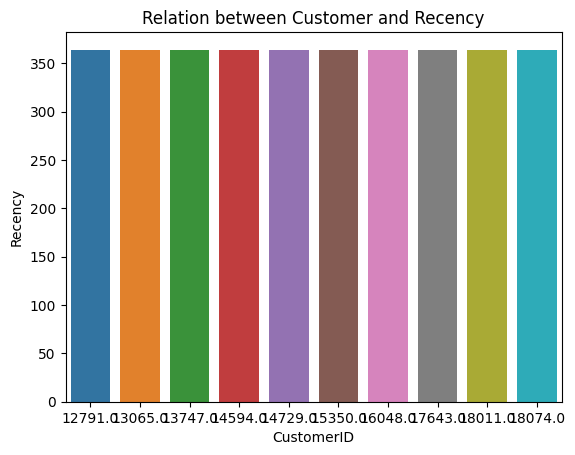

In [173]:
sns.barplot(x="CustomerID", y="Recency", data=RFM_df.sort_values(by='Recency',ascending=False).head(10))
plt.title('Relation between Customer and Recency')

Text(0.5, 1.0, 'Relation between Customer and Recency')

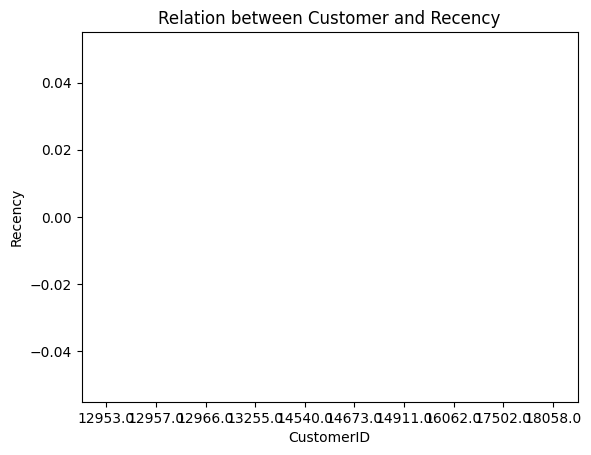

In [174]:
sns.barplot(x="CustomerID", y="Recency", data=RFM_df.sort_values(by='Recency',ascending=True).head(10))
plt.title('Relation between Customer and Recency')

In [180]:
data=RFM_df.sort_values(by='Recency',ascending=True)
data

,CustomerID,Recency,Frequency,Monetary,CLTV_Calculation,Customer_Age
1693,14673.0,0,4,1369.63,4665964.95,364
4128,18058.0,0,1,170.16,144922.46,364
2697,16062.0,0,4,1153.62,3930076.36,364
3727,17502.0,0,4,689.10,2347580.33,364
675,13255.0,0,2,399.51,680512.13,364
...,...,...,...,...,...,...
1637,14594.0,364,1,255.00,0.00,0
348,12791.0,364,1,192.60,0.00,0
3832,17643.0,364,1,101.55,0.00,0
538,13065.0,364,1,205.86,0.00,0


In [182]:
crm_final.loc[348:350]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Converted_Price
348,536401,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,1,2010-12-01,0.85,15862.0,United Kingdom,0.85,0.85
349,536401,84991,60 TEATIME FAIRY CAKE CASES,3,2010-12-01,0.55,15862.0,United Kingdom,1.65,0.55
350,536401,22810,SET OF 6 T-LIGHTS SNOWMEN,1,2010-12-01,2.95,15862.0,United Kingdom,2.95,2.95


In [183]:
RFM_df

,CustomerID,Recency,Frequency,Monetary,CLTV_Calculation,Customer_Age
0,12346.0,316,1,77183.60,8668483.08,48
1,12347.0,30,6,4085.18,19155158.57,334
2,12348.0,66,4,1797.24,5012555.20,298
3,12349.0,9,1,1757.55,1459865.61,355
4,12350.0,301,1,334.40,49292.82,63
...,...,...,...,...,...,...
4293,18280.0,268,1,180.60,40566.34,96
4294,18281.0,171,1,80.82,36496.65,193
4295,18282.0,117,1,100.21,57914.17,247
4296,18283.0,0,15,1886.88,24105367.74,364
